In [1]:
import sys, os, time, shutil, random
from pathlib import Path
_cwd = os.getcwd()
os.chdir(Path(_cwd)/'..')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import omnibelt as belt
import omnifig as fig
import numpy as np
np.set_printoptions(linewidth=120)
%load_ext autoreload
%autoreload 2
# %pdb
import pickle
from tabulate import tabulate
from tqdm import tqdm_notebook as tqdm
import torch
from torch import nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
# import torchvision.models
from torch.utils.data import Dataset, DataLoader, TensorDataset

%matplotlib notebook
import matplotlib.pyplot as plt
#plt.switch_backend('Qt5Agg') #('Qt5Agg')
# import matplotlib.patches as mpatches
# import matplotlib.pyplot as plt
# import matplotlib.cm
# from matplotlib import animation
# import matplotlib as mpl
# # mpl.rc('image', cmap='gray')
# import seaborn as sns
# import pandas as pd
# from sklearn.preprocessing import normalize

fig.initialize();
# import gpumap
# from c3linearize import linearize, class_graph

In [2]:
import plethora

In [32]:
from plethora.datasets.toy import SwissRollDataset, HelixDataset

In [11]:
# dataset = SwissRollDataset(1000, noise=.1).load()

dataset

NHelixDataset<None>[1000]

In [12]:
# for batch in dataset:
#     break
# batch

In [36]:
dataset = HelixDataset(5000, n_helix=5, w=2, noise=.01, periodic_strand=True).load()
X = dataset.get_observation()
X.shape

torch.Size([5000, 3])

<IPython.core.display.Javascript object>


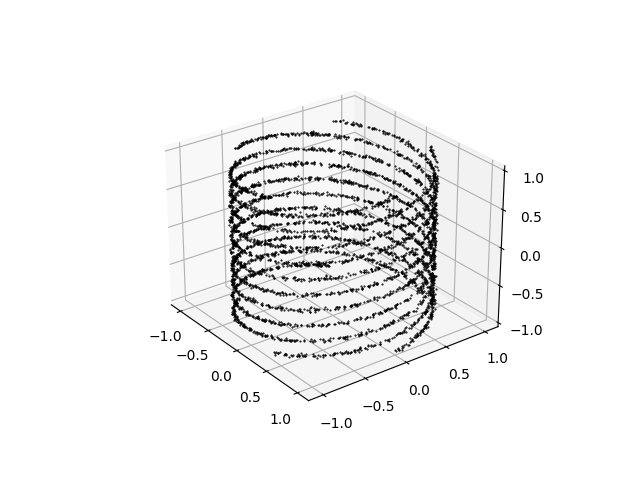

In [34]:
plt.figure()
data_ax = plt.axes(projection='3d')
plt.plot(*X.t(), ls='', marker='.', c='k', ms=1, );

In [39]:
dataset.get_label_space().expanded_len()

7

In [47]:
lbls = dataset.generate_label(6)
lbls

tensor([[-0.9269,  2.0000],
        [-0.5773,  0.0000],
        [ 0.7629,  2.0000],
        [-0.5492,  3.0000],
        [ 0.0580,  3.0000],
        [-0.9987,  1.0000]])

In [49]:
dataset.generate_observation_from_label(lbls)

tensor([[-0.9658,  0.1591, -0.9321],
        [-0.8807,  0.4796, -0.5727],
        [ 0.5173,  0.8665,  0.7698],
        [ 0.9439,  0.3157, -0.5291],
        [-0.5500, -0.8207,  0.0606],
        [ 0.2981,  0.9585, -1.0069]])

In [63]:
class A:
    @staticmethod
    def f(x):
        return x + 2

class B(A):
    @classmethod
    def f(cls, x):
        return super().f(x) * 2

In [64]:
b = B()
b.f(1)

6

In [5]:
len(dataset)

1000

In [6]:
dataset.get_observation().shape

torch.Size([1000, 3])

In [7]:
out = dataset.subset(0.5)
out

SwissRollDataset<None>[500]

In [8]:
dataset.get_observation().shape

torch.Size([1000, 3])

In [9]:
out.get_observation().shape

torch.Size([500, 3])

In [10]:
out = dataset.split({'train':None, 'val':0.2}, shuffle=True)
out

{'train': SwissRollDataset<train>[800], 'val': SwissRollDataset<val>[200]}

In [11]:
dataset

SwissRollDataset<None>[1000]

In [51]:
dataset.din, dataset.dout

(Joint(Bound(min=-1, max=1), Bound(min=-1, max=1), Bound(min=-1, max=1)),
 Joint(Periodic(2), Categorical(5)))

In [52]:
dataset.din.shape

(3,)

In [33]:
X = dataset.get_observation()
Y = dataset.get_label()
X.shape, Y.shape

(torch.Size([1000, 3]), torch.Size([1000, 2]))

In [36]:
# plt.figure()
# plt.plot(*Y.t(), ls='',marker='.');

<IPython.core.display.Javascript object>


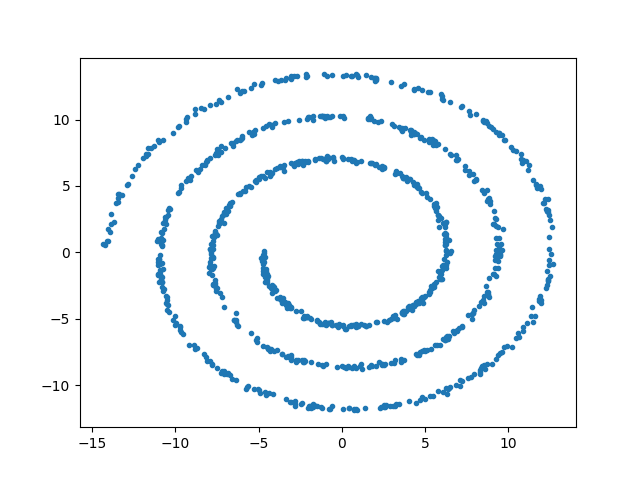

In [37]:
plt.figure()
plt.plot(*X[:,[0,2]].t(), ls='',marker='.');

In [25]:
# from sklearn.datasets import make_swiss_roll
# bX, _ = make_swiss_roll(1000)
# bX.shape
# plt.figure()
# plt.plot(*bX[:,[0,1]].T, ls='',marker='.');

In [7]:
lbl = dataset.generate_mechanism(10)
lbl

tensor([[6.7685, 0.0165],
        [8.6537, 0.5757],
        [7.4921, 0.5531],
        [5.4965, 0.5968],
        [7.4222, 0.8231],
        [7.4931, 0.1936],
        [4.6091, 0.7376],
        [3.5847, 0.0984],
        [5.7974, 0.7874],
        [8.1636, 0.5432]])

In [8]:
dataset.generate_observation_from_mechanism(lbl)

tensor([[-20.6409,   0.3474,  -5.1097],
        [-10.2236,  12.0894, -25.1909],
        [-19.3667,  11.6150, -13.3761],
        [-15.9491,  12.5323,   6.6183],
        [-19.6371,  17.2852, -12.5737],
        [-19.3625,   4.0665, -13.3881],
        [ -9.6970,  15.4897,  10.7536],
        [ -2.4747,   2.0669,  10.9864],
        [-17.6784,  16.5344,   4.3806],
        [-15.1215,  11.4067, -20.7147]])